# Project: Writing a Data Scientist Blog Post

## Introduction

This is a dataset of over 50 Cryptocurrencies' historical OHLC (Open High Low Close) data. The date range is from May 2013 to October 2022 on a daily basis. The dataset includes 6 variables such as open, high, low, close, volume, marketCap, timestamp, crypto_name, date.

## Question

- What are two of biggest coins?
- What is the distribution of Bitcoin and Tether?
- How is the trend of Tether coin?
- How is the trend of Bitcoin coin?
- Which elements did they affect on volume of bitcoin?
- Which elements did they affect on volume of Tether?

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
# load dataset
crypto = pd.read_csv('crypto_dataset.csv', index_col=0)

#extract timestamp column to date column with timestamp format
crypto['date'] = pd.to_datetime(crypto['date'], format='%Y-%m-%d')

### Explore data

In [3]:
crypto.head(5)

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72946 entries, 0 to 72945
Data columns (total 9 columns):
open           72946 non-null float64
high           72946 non-null float64
low            72946 non-null float64
close          72946 non-null float64
volume         72946 non-null float64
marketCap      72946 non-null float64
timestamp      72946 non-null object
crypto_name    72946 non-null object
date           72946 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.6+ MB


In [5]:
crypto.describe()

,open,high,low,close,volume,marketCap
count,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [7]:
crypto.sort_values('open',ascending = False).head(5)

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
63403,67549.735581,68530.339686,66382.061008,66971.828097,4.235799e+10,1.263667e+12,2021-11-09T23:59:59.999Z,Bitcoin,2021-11-09
63444,67540.313039,68453.634982,66458.723733,67017.892437,4.394344e+08,1.575817e+10,2021-11-09T23:59:59.999Z,Wrapped Bitcoin,2021-11-09
63481,67011.149451,68020.858140,52080.264370,64089.133662,5.587701e+08,1.532577e+10,2021-11-10T23:59:59.999Z,Wrapped Bitcoin,2021-11-10
63484,66953.339374,68789.625939,63208.114998,64995.229391,4.873083e+10,1.226432e+12,2021-11-10T23:59:59.999Z,Bitcoin,2021-11-10
62512,66057.604485,66579.309426,62245.126704,62291.108070,4.847762e+08,1.377213e+10,2021-10-21T23:59:59.999Z,Wrapped Bitcoin,2021-10-21


### What is the structure of your dataset?

This is a dataset of over 50 Cryptocurrencies' historical OHLC (Open High Low Close) data. The date range is from May 2013 to October 2022 on a daily basis. The dataset includes 6 variables: 

* open: Opening price on that particular date (UTC time)
* high: Highest price hit on that particular date (UTC time)
* low: Lowest price hit on that particular date (UTC time)
* close: Closing price on that particular date (UTC time)
* volume: Quantity of asset bought or sold, displayed in base currency
* marketCap: The total value of all the coins that have been mined. It's calculated by multiplying the number of coins in circulation by the current market price of a single coin
* timestamp: UTC timestamp of the day considered
* crypto_name: Name of the cryptocurrency
* date: timestamp converted to date

### Clean data

In [8]:
# remove outlier
q_low = crypto['high'].quantile(0.01)
q_high  = crypto['high'].quantile(0.99)
crypto_filtered = crypto[(crypto['high'] < q_high) & (crypto['high'] > q_low)]

In [9]:
list_col = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
for i in list_col:
    q_low = crypto[f'{i}'].quantile(0.01)
    q_high  = crypto[f'{i}'].quantile(0.99)
    crypto_filtered = crypto[(crypto[f'{i}'] < q_high) & (crypto[f'{i}'] > q_low)]

In [10]:
crypto_filtered.to_csv('cleaned_crypto.csv')

## Data Accessing

### 1. What are two of biggest coins?

Text(0,0.5,'Mean of volumn')

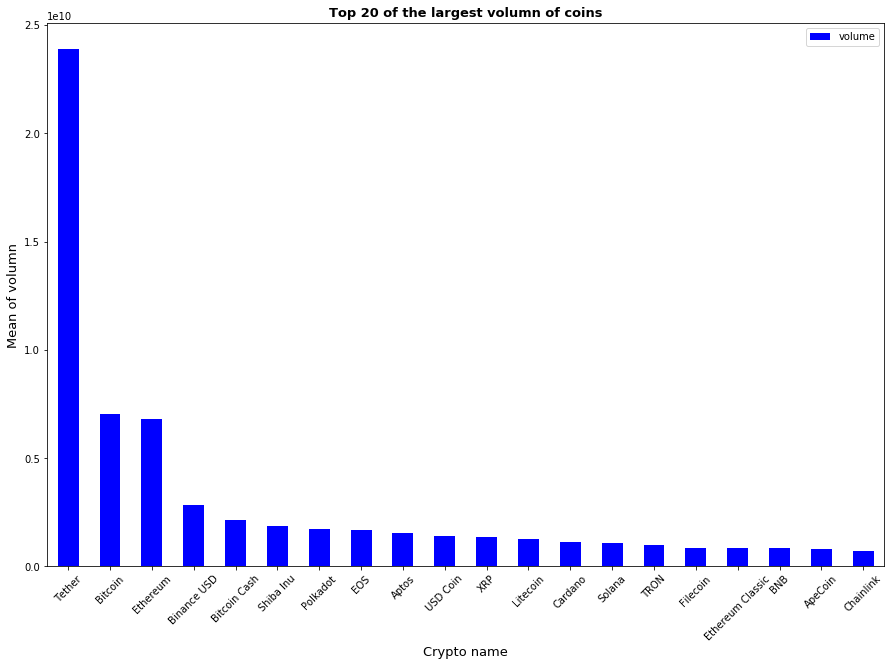

In [12]:
# visualize volume of coins by bar chart to see top 20 of the biggest coins
color = ['blue']
crypto_volumn = crypto_filtered.groupby(['crypto_name'], as_index = False).mean().sort_values(by=['volume'],ascending=False).head(20)
crypto_volumn.plot(kind='bar',x='crypto_name' ,y='volume', figsize=(15, 10), rot=45, color=color)
plt.title("Top 20 of the largest volumn of coins", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Crypto name", color = 'black', fontsize = '13')
plt.ylabel("Mean of volumn", color = 'black', fontsize = '13')

The bar chart presents Tether and Bitcoin are the biggest coin in top 20. So I will take a deep dive into these coins.

### 2. What is the distribution of Bitcoin and Tether?

Text(0,0.5,'Frequency of volumn')

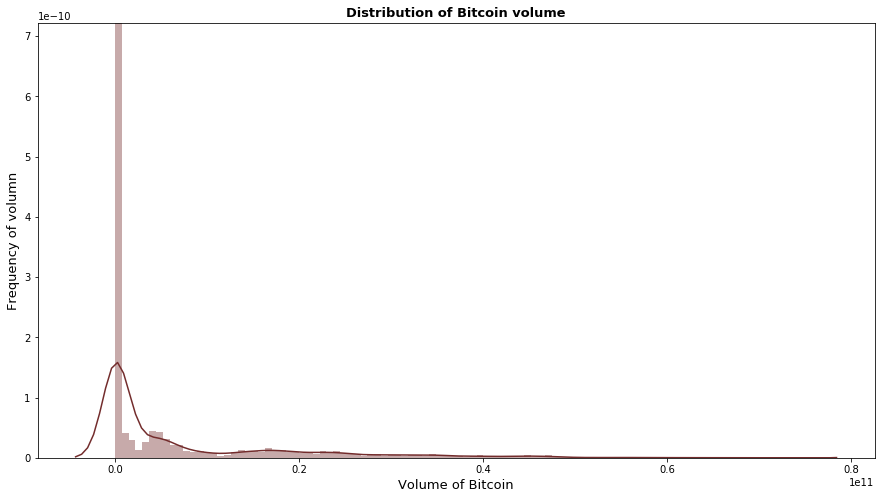

In [13]:
# visualize distribution of volume of Bitcoin
bitcoin= crypto_filtered[(crypto_filtered['crypto_name']=='Bitcoin')]
plt.figure(figsize=(15,8))
sb.distplot(bitcoin['volume'], bins=100, color='#732C2C')
plt.title("Distribution of Bitcoin volume", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Volume of Bitcoin", color = 'black', fontsize = '13')
plt.ylabel("Frequency of volumn", color = 'black', fontsize = '13')

The distribution of volume of bitcoin is skewed with the highest point nearly 0.

Text(0,0.5,'Frequency of price')

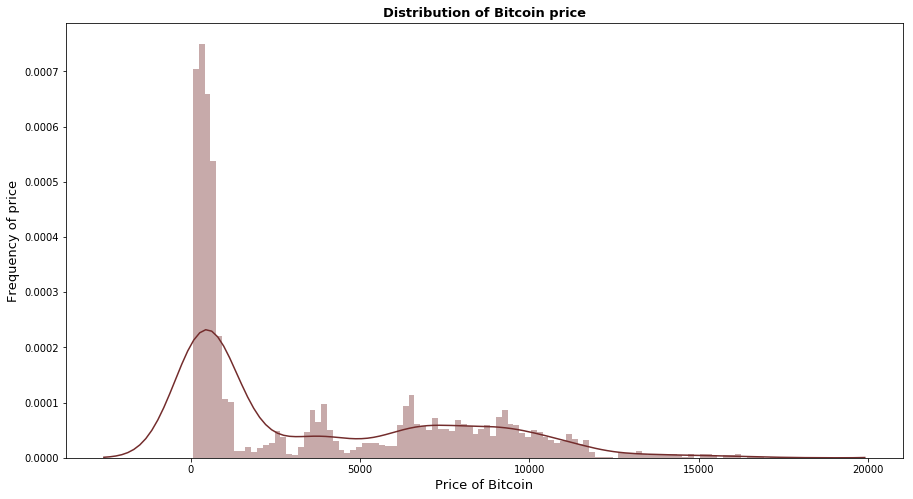

In [14]:
# visualize distribution of price of Bitcoin
plt.figure(figsize=(15,8))
sb.distplot(bitcoin['low'], bins=100, color='#732C2C')
plt.title("Distribution of Bitcoin price", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Price of Bitcoin", color = 'black', fontsize = '13')
plt.ylabel("Frequency of price", color = 'black', fontsize = '13')

The distribution of price of bitcoin is skewed with the highest point nearly 0. However, the higher volume was, the higher price would be, compared with volume chart.

Text(0,0.5,'Frequency of volumn')

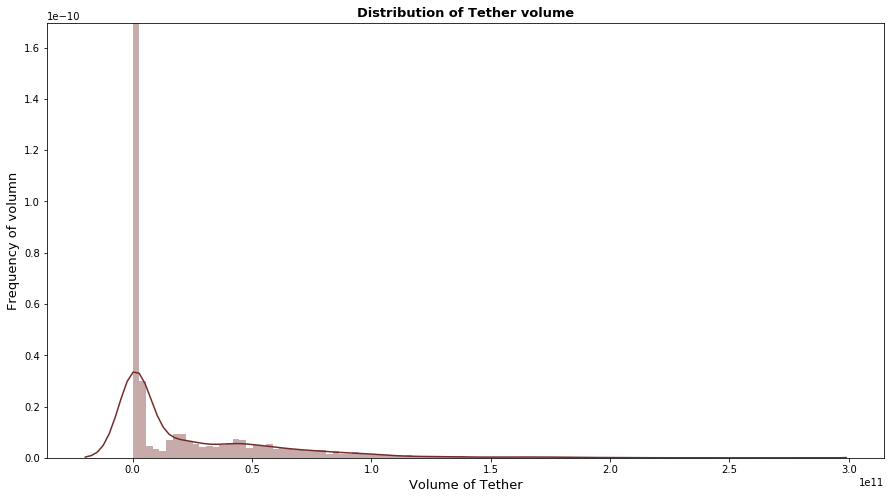

In [15]:
# visualize distribution of volume of Tether
tether= crypto_filtered[(crypto_filtered['crypto_name']=='Tether')]
plt.figure(figsize=(15,8))
sb.distplot(tether['volume'], bins=100, color='#732C2C')
plt.title("Distribution of Tether volume", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Volume of Tether", color = 'black', fontsize = '13')
plt.ylabel("Frequency of volumn", color = 'black', fontsize = '13')

The distribution of volume of Tether is skewed with the highest point nearly 0, the same as bitcoin.

Text(0,0.5,'Frequency of price')

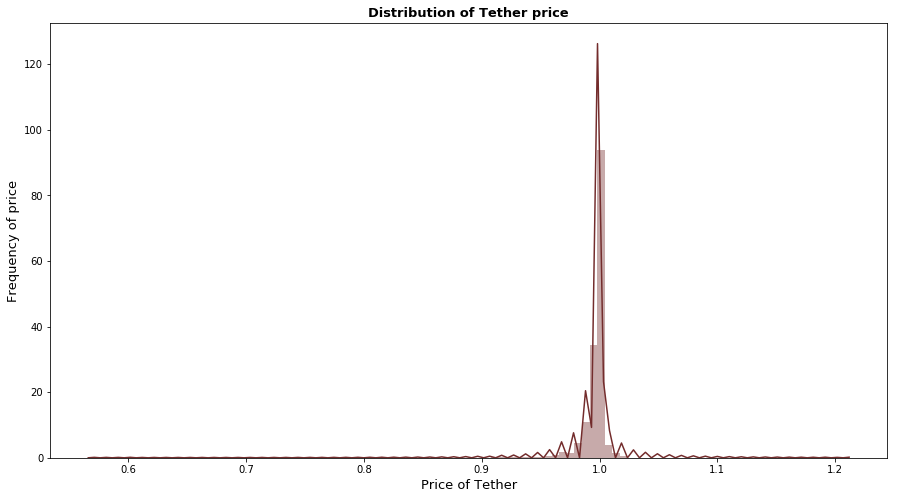

In [16]:
# visualize distribution of price of Tether
plt.figure(figsize=(15,8))
sb.distplot(tether['low'], bins=100, color='#732C2C')
plt.title("Distribution of Tether price", color = 'black', fontweight='bold', fontsize = '13')
plt.xlabel("Price of Tether", color = 'black', fontsize = '13')
plt.ylabel("Frequency of price", color = 'black', fontsize = '13')

The price of tether seemed to normal distribution.

#### Function for line chart

In [17]:
crypto_filtered['year']=crypto_filtered['date'].dt.year
def line_plot(x_col, y_col, fig_name, x_lable, y_lable,name_coin):
    """
    The function is to visualize the line graph. The params:
    name_coin: name of coin that you want to investigate
    x_col: x axes 
    y_col: y axes
    fig_name: name of the chart
    x_lable: lable of horizontal
    y_lable: lable of vertical
    """
    data= crypto_filtered[(crypto_filtered['crypto_name']==f'{name_coin}')]
    data.plot.line(x=f'{x_col}', y=f'{y_col}', figsize=(15, 10))
    plt.title(f"{fig_name}", color = 'black', fontweight='bold', fontsize = '13')
    plt.xlabel(f"{x_lable}", color = 'black', fontsize = '13')
    plt.ylabel(f"{y_lable}", color = 'black', fontsize = '13')
    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### How is the trend of Tether coin?

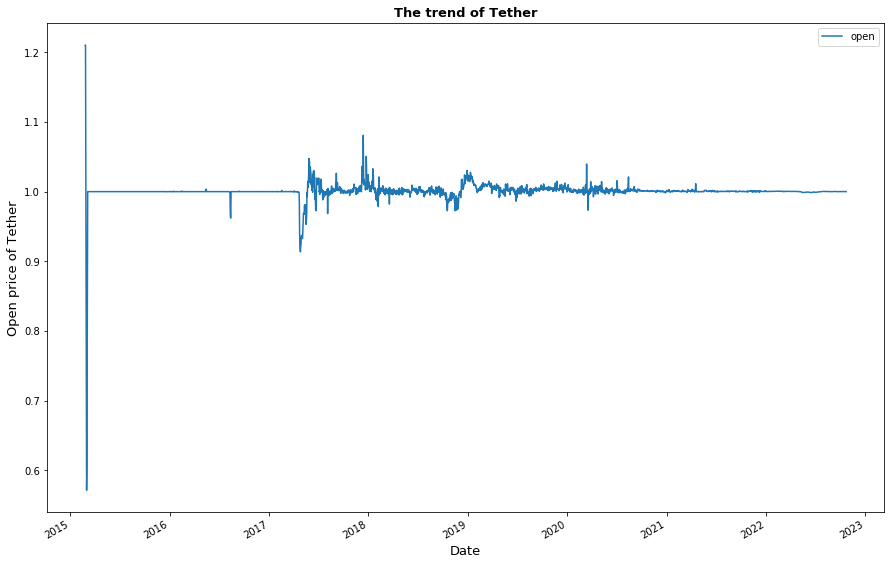

In [18]:
# visualize the trend of open price of Tether coin
line_plot('date', 'open',"The trend of Tether", "Date", "Open price of Tether", 'Tether')

The line plot shows open price of Tether is quite stable, overall. However, the open price was felt considerably from 1.2 to under 0.6 dollar. Then, open price rose dramatically intermediately. 

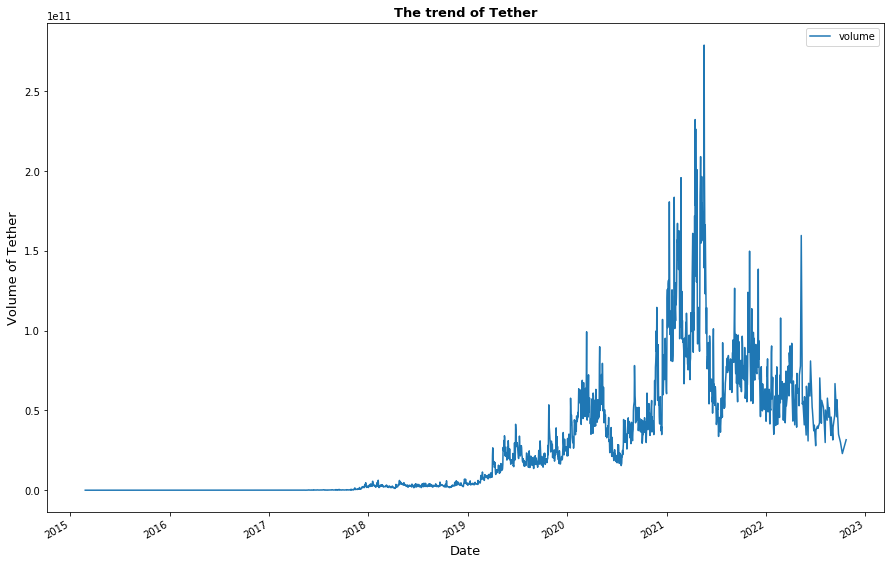

In [19]:
# visualize the trend of volume of Tether coin
line_plot('date', 'volume',"The trend of Tether", "Date", "Volume of Tether", 'Tether')

The volume of this coin was nearly 0 since 2015. The figure had change in 2018, especially from 2019. In 2021, volume reached the peak at 2.5 e11. 

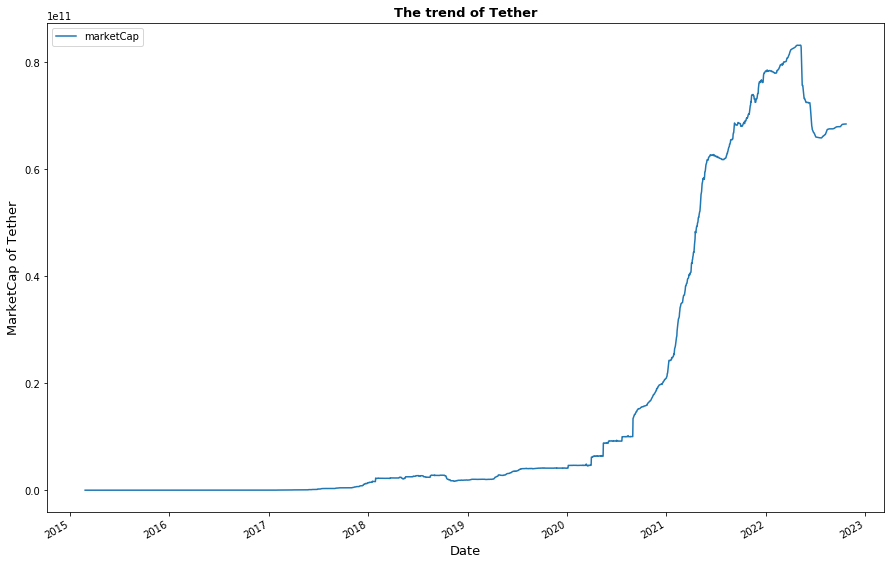

In [20]:
# visualize the trend of market cap of Tether coin
line_plot('date', 'marketCap',"The trend of Tether", "Date", "MarketCap of Tether", 'Tether')

The line chart shows the trend of market cap of Tether coin. Obviously, the trend of market cap had positive impact with volume. It is clearly that market cap started to rise when volume of the coin rose.

### How is the trend of Bitcoin coin?

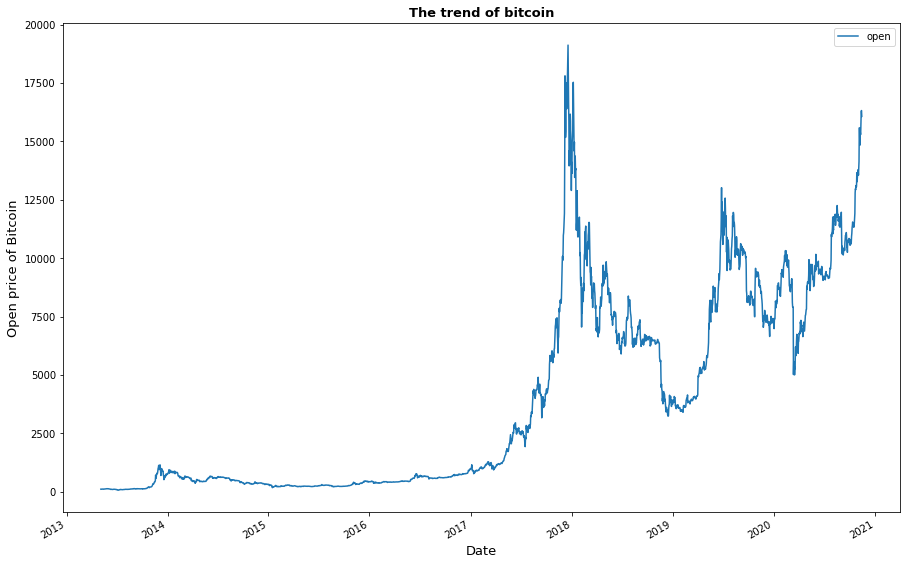

In [21]:
# visualize the trend of open price of Bitcoin coin
line_plot('date', 'open', "The trend of bitcoin", "Date", "Open price of Bitcoin", 'Bitcoin')

The line plot presents the trend of open price of bitcoin. Overall, the trend fluctuated. As we can see, open price reached the peak at 20.000 dollar in 2018. As soon as, this trend is deeply felt uptill early 2019 and rose after that.

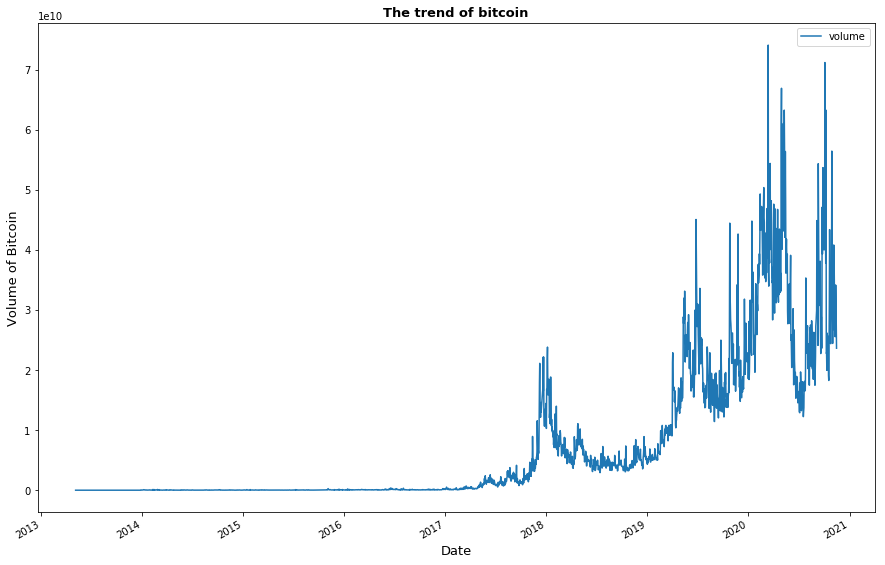

In [22]:
# visualize the trend of volume of Bitcoin coin
line_plot('date', 'volume', "The trend of bitcoin", "Date", "Volume of Bitcoin", 'Bitcoin')

The trend of volume of Bitcoin was seem to correlate with open price. I supposed that when price rose, buyers spent more money on the coin.

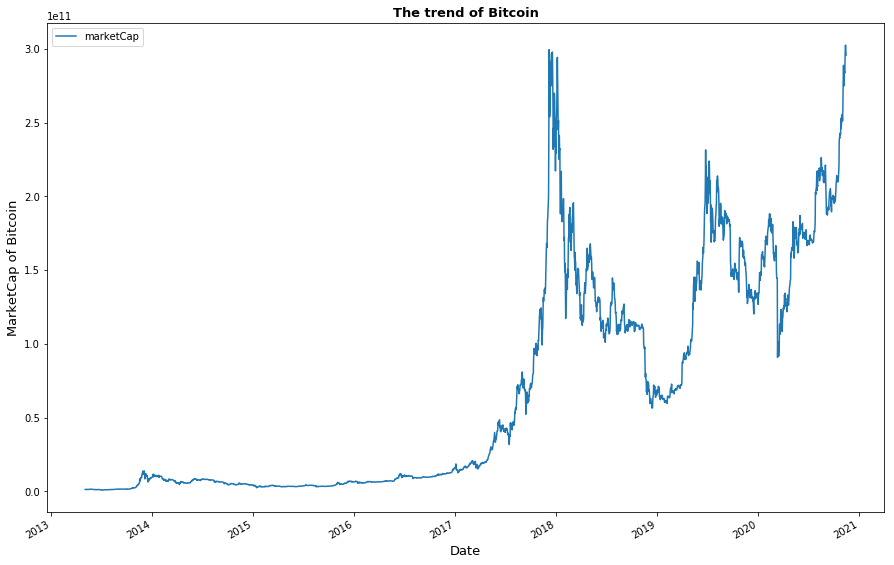

In [23]:
# visualize the trend of market cap of Bitcoin coin
line_plot('date', 'marketCap',"The trend of Bitcoin", "Date", "MarketCap of Bitcoin", 'Bitcoin')

The same trend of volume and open price. That might be the higher volume of the coin was, the more valuable the coin was.

### The function for scatter plot

In [24]:
def scatter_plot(name_coin, x_col, y_col, fig_name, x_lable, y_lable):
    """
    The function is to draw scatter plots by coin you want. The params:
    name_coin: name of coin that you want to investigate
    x_col: x axes 
    y_col: y axes
    fig_name: name of the chart
    x_lable: lable of horizontal
    y_lable: lable of vertical
    """
    data = crypto_filtered[crypto_filtered['crypto_name']==f'{name_coin}']
    plt.figure(figsize=(15, 10))
    plt.scatter(x=crypto_filtered[f'{x_col}'], y=crypto_filtered[f'{y_col}'])
    plt.title(f"{fig_name}", color = 'black', fontweight='bold', fontsize = '13')
    plt.xlabel(f"{x_lable}", color = 'black', fontsize = '13')
    plt.ylabel(f"{y_lable}", color = 'black', fontsize = '13')
    plt.show()

### Which elements did they affect on volume of bitcoin?

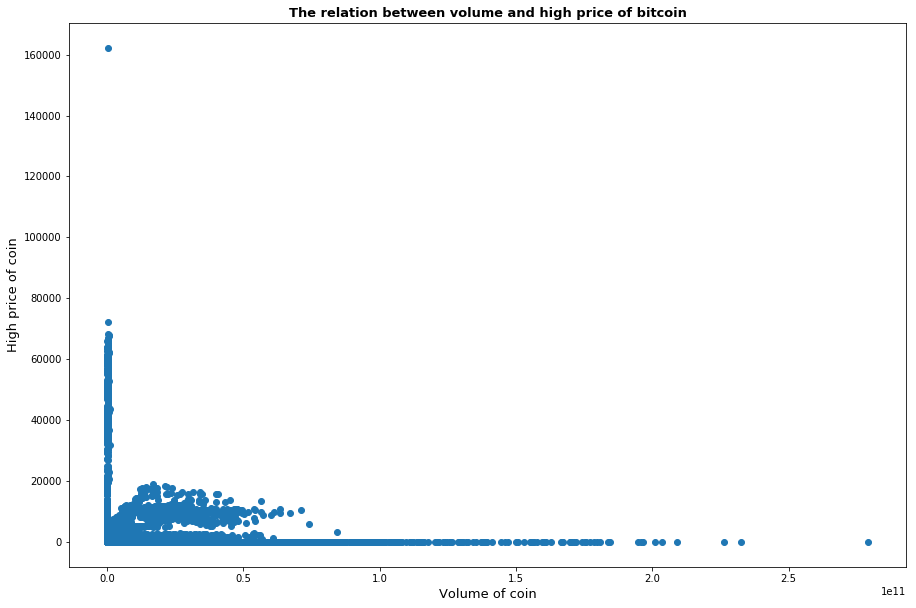

In [25]:
# visualize the relation between volume and high price of bitcoin
scatter_plot('Bitcoin', 'volume', 'high', 'The relation between volume and high price of bitcoin', 'Volume of coin', 'High price of coin')

The scatter plot shows the relation of bitcoin high volume and bitcoin price. The points shows that no correlation between 2 columns.

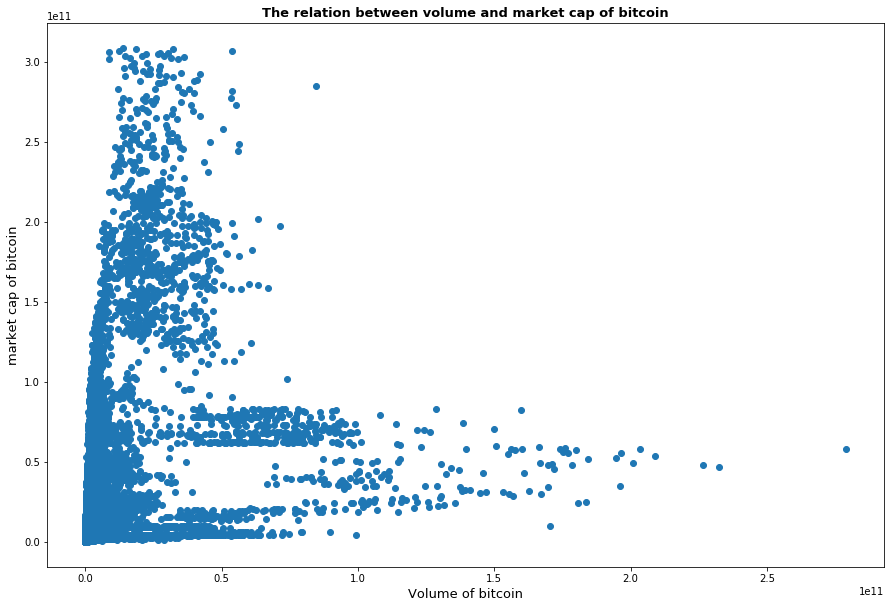

In [26]:
# visualize the relation between volume and market cap of bitcoin
scatter_plot('Bitcoin', 'volume', 'marketCap', 'The relation between volume and market cap of bitcoin', 'Volume of bitcoin', 'market cap of bitcoin')

The scatter plot shows the relation of bitcoin high volume and bitcoin market cap. The points shows that no correlation between 2 columns.

### Which elements did they affect on volume of Tether?

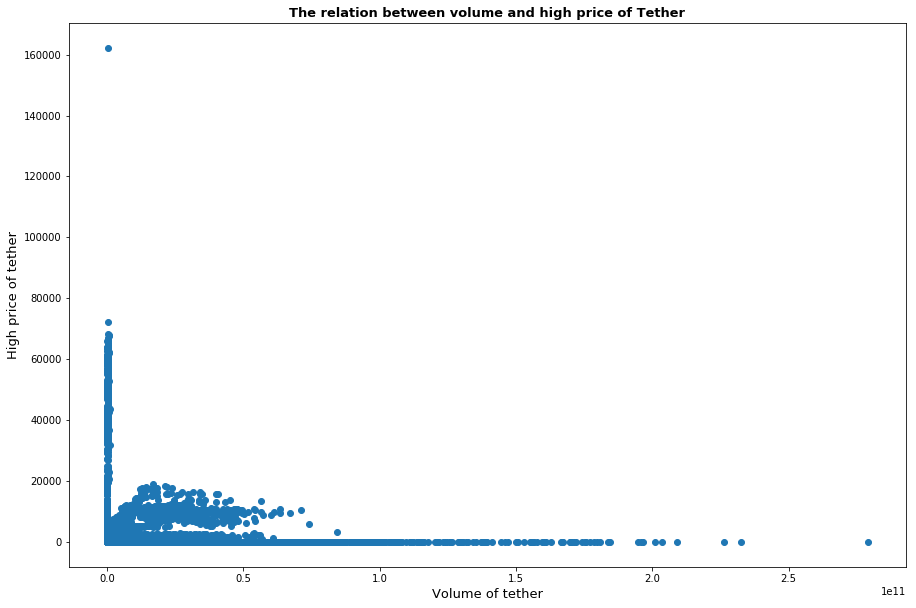

In [27]:
# visualize the relation between volume and high price of Tether
scatter_plot('Tether', 'volume', 'high', 'The relation between volume and high price of Tether', 'Volume of tether', 'High price of tether')

The scatter plot shows the relation of tether volume and tether high price. The points shows that no correlation between 2 columns.

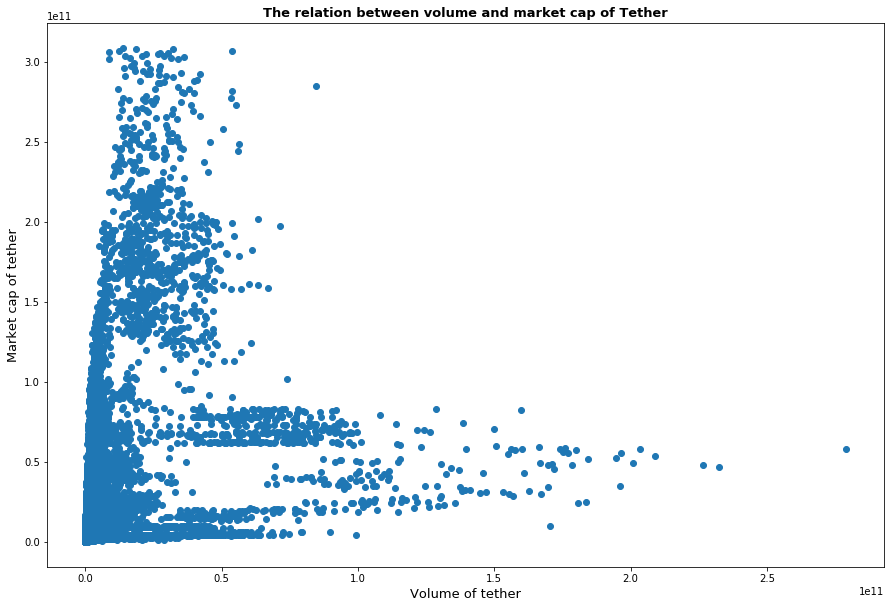

In [28]:
# visualize the relation between volume and market cap of Tether
scatter_plot('Tether', 'volume', 'marketCap', 'The relation between volume and market cap of Tether', 'Volume of tether', 'Market cap of tether')

The scatter plot shows the relation of tether volume and tether market cap. The points shows that no correlation between 2 columns.

## Conclusions
In conclusion, current values (market cap) did not affect on the number of coin buyers. The prof is in above parts. Thus, I conclude that coins are more and more popular with investors. Besides, coins are quite difficult to predict the trend because of no reports as bond or stock so buyers based on upward trend of the coins to invest. That is reason why price did not affect on volume of coins.
